In [1]:
from sklearn.datasets import load_breast_cancer, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier, SGDRegressor
from sklearn.svm import LinearSVC
import pandas as pd 
import mglearn
import numpy as np 
import matplotlib.pyplot as plt 

plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

# Binary classification (이진 분류)  


- 입력값에 따라 모델이 분류한 카테고리가 두 가지인 분류 알고리즘
- True or False 구별하는데 주로 사용함. 
- 선형 기반 모델
    - Logistic Regression (로지스틱 회귀), SVM (서포트 벡터 머신), Perceptron (퍼셉트론), LDA (Linear Discriminant Analysis, 선형 판변 분석) 등
- 트리 기반 모델
    - Decision Tree (의사결정나무), Random Forest (랜덤 포레스트), Gradient Boosting, XGBoost, LightGBM (그래디언트 부스팅) 등
- 신경망 기반 모델
    - MLP (Multi-Layer Perceptron, 단층 혹은 다층 퍼셉트론), CNN, RNN, Transformer 등
- 확률/ 통계적방법
    - Naive Bayes (나이브 베이즈), k-NN (k-최근접 이웃) 등
- 특수한 상황의 이진 분류
    - Anomaly Detection (이상치 탐지), 로지스틱 회귀 변형 (L1, L2 규제 추가)

예측을 위한 방정식  
$\hat{y}=w[0]\times x[0]+\dots w[p]\times x[p] + b > 0$  
특성들의 예측한 값을 임계치 0과 비교  
함수에서 계산한 값이 
- 0보다 작으면 ==> 클래스 -1  
- 0보다 크면 ==> 클래스 +1 

## 선형 기반 모델

In [10]:
X, y = mglearn.datasets.make_forge()

print("X의 형태 : ",X.shape)
print("y의 형태 : ",y.shape)
print("클래스 라벨 : ",np.unique(y))
print("특성 예시 : \n",X[:5])
print("레이블 예시 : ",y[:5])
print("\n ==> 26개의 샘플, 2개의 특성, 이진 클래스로 이루어진 인공 데이터셋")

X의 형태 :  (26, 2)
y의 형태 :  (26,)
클래스 라벨 :  [0 1]
특성 예시 : 
 [[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]]
레이블 예시 :  [1 0 1 0 0]

 ==> 26개의 샘플, 2개의 특성, 이진 클래스로 이루어진 인공 데이터셋


- LinearSVC : SVM 의 선형 버전. margin (결정 경계와 가장 가까운 샘플간 거리) 를 최대로 하는 선형 분류기
- LogisticRegression : 로지스틱 회귀 (시그모이드 기반 확률 모델). 클래스의 확률을 예측하고, 결정 경계는 확률 0.5 인 선으로 결정.  

두 모델은 기본적으로 L2 규제를 사용함.  
규제의 강도는 매개변수 C 를 통해 결정. C 가 높아지면 규제가 감소함


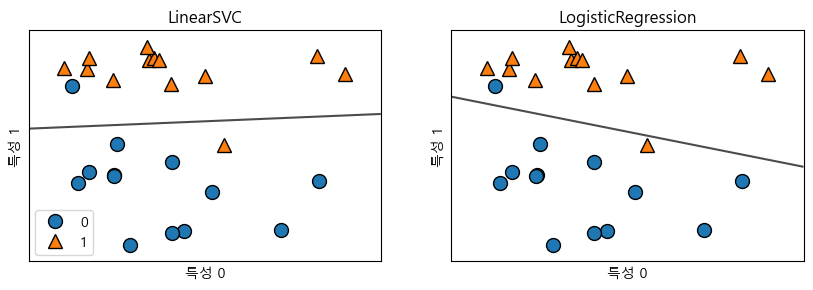

In [14]:
X,y = mglearn.datasets.make_forge()

fig,axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(max_iter=5000),LogisticRegression()],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,ax=ax,alpha=0.7)
    # fill = False ==> 경계선만 그릴지 (False), 영역 색칠까지 할지 (True)
    # eps = 0.5 ==> 데이터 범위보다 얼마나 여유있게 plot 영역을 확장할지
        # 0 ==> 데이터 범위에 딱 맞춤
        # 0.1 ~ 0.5 기본값
        # > 1.0 넓은 여유
        # < 0 유효하지 않음
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax) 
    ax.set_title(clf.__class__.__name__) # 객체의 클래스 이름 문자열을 자동으로 가져옴
    # 
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

### Logistic Regression

In [18]:
cancer = load_breast_cancer()
print(cancer.data.shape)
print(cancer.target.shape)
print("클래스 이름:", cancer.target_names)
print("특성 이름:", cancer.feature_names)
print("양성 샘플 수:", sum(cancer.target == 1))
print("악성 샘플 수:", sum(cancer.target == 0))

(569, 30)
(569,)
클래스 이름: ['malignant' 'benign']
특성 이름: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
양성 샘플 수: 357
악성 샘플 수: 212


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=42
)
logreg = LogisticRegression(max_iter=5000).fit(X_train,y_train)

print("훈련 세트 점수 : {:.3f}".format(logreg.score(X_train,y_train)))
print("테스트 세트 훈련 점수 : {:.3f}".format(logreg.score(X_test,y_test)))

훈련 세트 점수 : 0.958
테스트 세트 훈련 점수 : 0.958


In [21]:
# regularization C 에 따른 점수

logreg001 = LogisticRegression(C=0.001,max_iter=5000).fit(X_train,y_train)
logreg1   = LogisticRegression(C=1,max_iter=5000).fit(X_train,y_train)
logreg100 = LogisticRegression(C=1000,max_iter=5000).fit(X_train,y_train)

print("C=0.001")
print("훈련 세트 점수 : {:.3f}".format(logreg001.score(X_train,y_train)))
print("테스트 세트 훈련 점수 : {:.3f}".format(logreg001.score(X_test,y_test)))

print("\n C=1")
print("훈련 세트 점수 : {:.3f}".format(logreg1.score(X_train,y_train)))
print("테스트 세트 훈련 점수 : {:.3f}".format(logreg1.score(X_test,y_test)))

print("\n C=1000")
print("훈련 세트 점수 : {:.3f}".format(logreg100.score(X_train,y_train)))
print("테스트 세트 훈련 점수 : {:.3f}".format(logreg100.score(X_test,y_test)))

# C 가 작을수록 과소적합되어 정확도 낮아짐

C=0.001
훈련 세트 점수 : 0.953
테스트 세트 훈련 점수 : 0.944

 C=1
훈련 세트 점수 : 0.958
테스트 세트 훈련 점수 : 0.958

 C=1000
훈련 세트 점수 : 0.986
테스트 세트 훈련 점수 : 0.979


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 5000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=5000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[ 4.48988874e-04 -3.87913212e-02 -2.63031541e-02  2.15244162e-02
  -3.10463533e-04 -9.88607528e-04 -1.40391022e-03 -5.66402081e-04
  -5.38890837e-04 -1.35011647e-04 -3.88009818e-04 -1.94546924e-03
  -4.15548635e-03 -3.46941677e-02 -3.88306185e-05 -2.35114895e-04
  -3.43385309e-04 -9.11755209e-05 -1.03500921e-04 -2.15123578e-05
  -1.18817734e-03 -6.78027345e-02 -5.07037516e-02 -2.11192259e-02
  -5.89287636e-04 -3.59238574e-03 -4.42668802e-03 -1.25128300e-03
  -1.48191195e-03 -4.21317668e-04]]


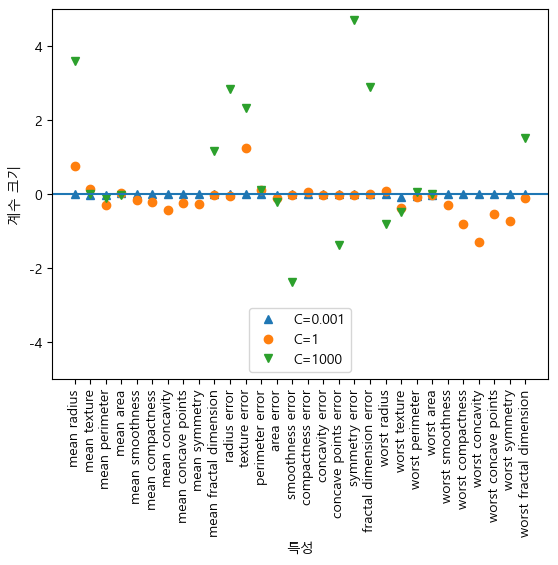

In [26]:
# .coef_.T  로지스틱 회귀의 계수 (weight) 행렬을 전치한 것.
print(logreg001.coef_)
plt.plot(logreg001.coef_.T,'^',label='C=0.001')
plt.plot(logreg1.coef_.T,'o',label='C=1')
plt.plot(logreg100.coef_.T,'v',label='C=1000')
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
xlims=plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

C=0.001 인 L1 로지스틱 회귀의 훈련 정확도 : 0.91
C=0.001 인 L1 로지스틱 회귀의 테스트 정확도 : 0.92
C=1.000 인 L1 로지스틱 회귀의 훈련 정확도 : 0.96
C=1.000 인 L1 로지스틱 회귀의 테스트 정확도 : 0.96
C=1000.000 인 L1 로지스틱 회귀의 훈련 정확도 : 1.00
C=1000.000 인 L1 로지스틱 회귀의 테스트 정확도 : 0.94


Text(0, 0.5, '계수 크기')

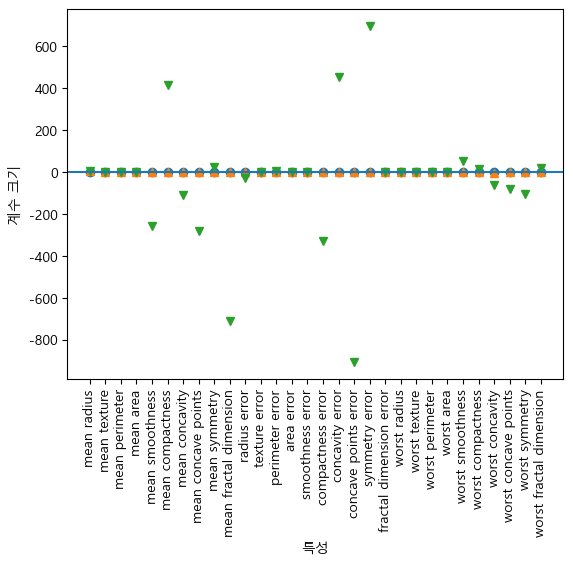

In [27]:
# L1 규제 사용
for C, marker in zip([0.001,1,1000],['o','^','v']):
    lr_l1 = LogisticRegression(solver='liblinear',C=C,penalty='l1',max_iter=1000).fit(X_train,y_train)
    # solver : 로지스틱 회귀 모델을 학습시킬 때 사용하는 최적화 알고리즘. 가중치 찾는 방법
        # liblinear (Library for Large Linear Classification) : 소규모 데이터셋에 적합. 좌표축 하강법 (coordinate descent) 를 사용함. L1, L2 규제 지원
        # lbfgs : 기본값. 대규모 데이터에 효율적. 다중 클래스도 지원. L2 규제 지원
        # newton-cg : 뉴턴 방법 기반. L2 만 지원.
        # sag : 확률적 평균 경사 하강법. 대규모 sparse 데이터에 적합. L2 규제 지원
        # saga : sag 개선 버전. L1, L2, elasticnet 모두 지원.
    # penalty 종류 : L1, L2, elasticnet (L1+ L2), none
    # max_iter : 최적화 반복 횟수의 최대치. 데이터가 간단하면 ~100, 규제가 강하거나 feature 가 많으면 ~5000
    print("C={:.3f} 인 L1 로지스틱 회귀의 훈련 정확도 : {:.2f}".format(C,lr_l1.score(X_train,y_train)))
    print("C={:.3f} 인 L1 로지스틱 회귀의 테스트 정확도 : {:.2f}".format(C,lr_l1.score(X_test,y_test)))

    plt.plot(lr_l1.coef_.T,marker,label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
xlims=plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")


## 다중 클래스 분류용 선형 모델 

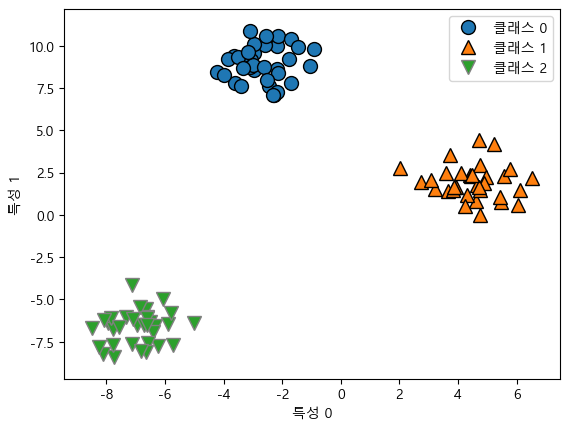

In [28]:
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0","클래스 1","클래스 2"])

서포트벡터 머신은 돌아다니면서 x+ 직선 (평면) 과 x- 직성 (평면) 을 만든다.  
$x^+ = x^- + \lambda\omega$  
이때 $\lambda$ 는 마진. ==> 마진 최대화가 SVM 목표.

계수 배열의 크기 :  (3, 2)
절편 배열의 크기 :  (3,)


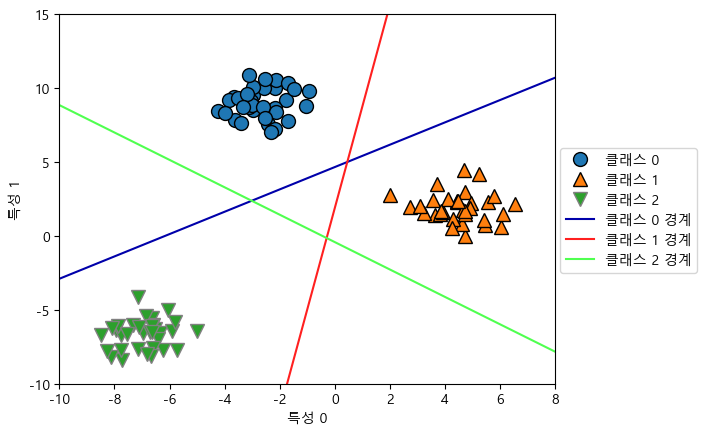

In [30]:
linear_svm = LinearSVC().fit(X,y)
print("계수 배열의 크기 : ",linear_svm.coef_.shape)
print("절편 배열의 크기 : ",linear_svm.intercept_.shape) # 각 클래스의 절편을 닮은 1차원 벡터

# 세 개의 이진 분류기가 만드는 경계 시각화
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip (linear_svm.coef_,linear_svm.intercept_,mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1],c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0','클래스 1','클래스 2','클래스 0 경계','클래스 1 경계','클래스 2 경계'],loc=(1.01,0.3))

SVM 의 결정 경계식.   
Linear SVC 는 직선 형태의 경계를 학습함. 기본 형태는  
$\omega_0 x_0+\omega_1x_1+b=0$   
$x_1=-{\omega_0\over\omega_1}x_0-{b\over\omega_1}$  

line = x   
coef[0],coef[1] = $\omega_0,\omega_1$   
intercept = b  

Text(0, 0.5, '특성 1')

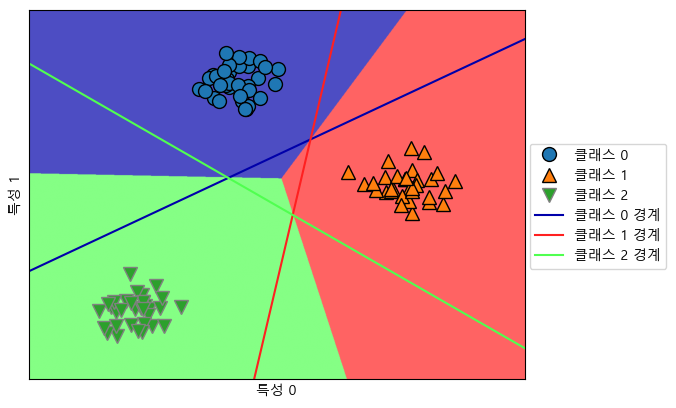

In [31]:
mglearn.plots.plot_2d_classification(linear_svm,X,fill=True,alpha=0.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)
for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,mglearn.cm3.colors):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
plt.legend(['클래스 0','클래스 1','클래스 2','클래스 0 경계','클래스 1 경계','클래스 2 경계'],loc=(1.01,0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

## 확률 /통계적 방법

### 확률적 경사 하강법

손실함수 (loss function) 을 최소화하는 가중치 w 찾기. 
i.e. 로지스틱 회귀의 손실함수
    $L(w)=-\sum_i[y_i\log(\hat{y}_i)+(1-y_i)\log(1-\hat{y}_i)]$

1. 전체 데이터를 이용해 기울기(gradient) 를 구하고 그 방향으로 조금씩 이동해 손실을 줄임.   
$w := w-\eta\frac{\partial L(w)}{\partial w}$   
where w : 가중치 (학습 파라미터), $\eta$ 는 학습률 (learning rate), $\partial L(w)\over \partial w$ 는 손실 함수의 기울기.    

그러나 전체 데이터로 미분하면 계산이 느려지므로 확률적 경사 하강법 (SGD) 사용
2. 모든 데이터 대신 단 하나의 샘플만 사용해 기울기를 근사적으로 계산.  즉, 매번 업데이트를  
$w := w-\eta\frac{\partial L_i(w)}{\partial{w}}$  
여기서 $L_i$ 는 한 개의 샘플의 손실

- loss 매개변수에 최적화할 손실 함수를 지정
- SGDClassifier
    - loss 의 기본값은 힌지 손실인 'hinge' 이며 서포트 벡터 머신 모델을 훈련함.
        - $\max(0,1-y(wx+b))$
        - SVM 의 경계 손실, margin 밖이면 0
    - 'log_loss' 는 로지스틱 회귀 모델을 훈련함.
        - $-[y\log(p)+(1-y)\log(1-p)]$
        - 확률 기반. 오차가 클수록 페널치가 큼
    - 'modified_huber' 는 outlier 에 강함
        - 부드러운 hinge (부드러운 서포트 벡터 머신)

- SGDRegressor
    - loss 매개변수의 기본값은 'squared_error' 로 릿지 모델을 훈련함.
        - $(y-\hat{y})^2$
    - 'huber' 은 outlier 완화형 MSE 
    - 'epsilon_insensitive' 는 SVR 의 eta-insensitive loss

- SGD 공통 사항
    - penalty 매개변수에 L1, L2, elasticnet 을 지정할 수 있으며 기본값은 L2
    - alpha 로 매개변수 조정. 기본값은 0.0001 이며 값이 클수록 규제 강도가 높아짐.
    - 알고리즘 반복횟수는 max_iter 매개변수로 지정하며 기본값은 1.000
    - 매개변수의 기본값은 Flas 로 n_iter_no_change (기본값 5) 에 지정한 반복 훈련 세트 점수가 적어도 tol (기본값 1e-3) 에 지정한 값만큼 향상되지 않으면 훈련을 종료.
    - SGD 의 학습률은 learning_rate 로 지정
        - 기본값은 'optional' 로 반복횟수에 따라 비례적으로 감소함.
        - 'constant' 는 eta0 매개변수에 지정한 값을 사용
        - eta0 의 기본값은 0
        - 'invscaling'은 eta0 에서 시작하여 지수적으로 감소

SGD 장/단
- 장 : 대용량 데이터에 사용할 수 있고 속도가 빠름
-  단 : 튜닝할 하이퍼파라미터가 많고 특성 스케일에 민감.


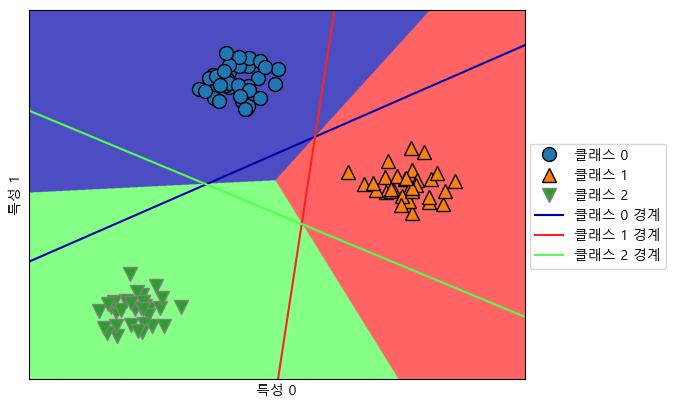

In [32]:
sgd_c = SGDClassifier(alpha=0.01, learning_rate = 'adaptive', eta0=0.1,random_state=42,n_jobs=1)
sgd_c.fit(X,y)

mglearn.plots.plot_2d_classification(sgd_c,X,fill=True,alpha=0.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)
for coef,intercept,color in zip(sgd_c.coef_,sgd_c.intercept_,mglearn.cm3.colors):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
plt.legend(['클래스 0','클래스 1','클래스 2','클래스 0 경계','클래스 1 경계','클래스 2 경계'],loc=(1.01,0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.show()
           

In [ ]:
# 확장된 보스턴 데이터셋에 SGDRegressor 모델을 훈련

from sklearn.linear_model import SGDRegressor

X, y = mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
sgd_r = SGDRegressor(learning_rate='adaptive',eta0=0.1,random_state=42)
sgd_r.fit(X_train,y_train)

print("훈련 세트 점수 :{:.2f}".format(sgd_r.score(X_train,y_train)))
print("테스트 세트 점수 : {:.2f}".format(sgd_r.score(X_test,y_test)))

훈련 세트 점수 :0.90
테스트 세트 점수 : 0.82


- learning_rate : 학습률을 어떻게 변화시킬지 결정하는 전략
    - 'constant' : 고정 학습률, $\eta=eta0$, 일정한 속도로 학습
    - 'optimal'  : 경험적 규칙에 따라 감소, $\eta=1/(\alpha*(t_0+t))$, 보통 기본값, 안정적
    - 'invscaling' : 점점 작아짐. $ \eta = \eta_0/\text{pow}(t,\text{power}_t)$, 점진적 감소
    - 'adaptive' : 일정 기간 개선 없으면 $\eta_0$ 을 0.5 배로 감소. plateau (정체) 에 반응함.

- eta0 : 초기 학습률 
    - 값이 너무 크면 발산하고, 너무 작으면 학습이 거의 진행되지 않음
    - SGDRegressor 회귀모델은 보통 0.0001 ~ 1.0 으로 설정. 
    - SGDClassifier 는 보통 0.001 ~ 0.1 로 설정. 로짓 경사에 민감함.

### 나이브 베이즈 (naive bayes) 분류기

- 데이터가 주어졌을 때, 어떤 클래스 $C_k$ 에 속할 확률 계산
    - $P(C_k|X)=\frac{P(X|C_k)P(C_k)}{P(X)}$ 여기서, C_k 는 예측하고 싶은 값, X 는 주어진 데이터
- 특성(features) 들이 서로 독립이라고 가정하기 때문에 naive
- Logistic Regression 이나 Linear SVC 와 같은 선형분류기보다 훈련 속도가 빠른 편이지만 일반화 성능이 조금 떨어짐.
- 특성을 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순 취합
- scikit-learn 에 구현된 나이브 베이즈 분류기
    - GaussianNB : 연속적인 어떤 데이터에도 적용 가능. 클래스 별로 각 특성의 분산과 평균을 저장
    - BernoulliNB : 이진데이터, 텍스트 데이터
    - MultinomialNB : 카운트 데이터에 적용, 텍스트 데이터, 클래스 별로 평균 계산
- Multinominal 과 Bernoulli 의 예측 공식은 선형 모델과 형태가 같음.
- 나이브 베이즈 모델의 coef_ 는 기울기 w가 아니라 선형 모델과는 의미가 다름

In [34]:
# BernoulliNB 분류기는 각 클래스의 특성 중 0이 아닌 것이 몇 개인지 셈
X = np.array([[0,1,0,1],
              [1,0,1,1],
              [0,0,0,1],
              [1,0,1,0]])
y = np.array([0,1,0,1])

counts = { }
for label in np.unique(y):
    # 각 클래스에 대해 반복
    # 특성마다 1이 나타난 횟수를 센다
    counts[label]=X[y==label].sum(axis=0)
print("특성 카운트:\n",counts)

특성 카운트:
 {np.int64(0): array([0, 1, 0, 2]), np.int64(1): array([2, 0, 2, 1])}


- MultinominalNB 와 BernoulliNB 는 모델의 복잡도를 조절하는 alpha 매개변수 하나를 가지고 있음
    - alpha가 주어지면 알고리즘이 모든 특성에 양의 값을 가진 가상의 데이터 포인트를 alpha 개수만큼 추가함
    - alpha가 크면 더 완만해지고 모델의 복잡도는 낮아짐
    - alpha 에 따른 알고리즘 성능 변동은 비교적 크지 않아서, alpha 값이 성능 향상에 크게 기여하지 않음.
- GaussianNB 는 대부분 매우 고차원인 데이터셋에 사용하고, 다른 두 나이브 베이즈 모델은 텍스트 같은 희소한 데이터를 카운트하는 데 사용함
- MultinominalNB 는 보통 0이 아닌 특성이 비교적 많은 데이터셋에서 BernoulliNB 보다 성능이 높음.
- 나이브 베이즈 모델과 선형 모델의 장단점은 비슷함
    - 훈련과 예측 속도가 빠르며 훈련 과정을 이해하기 쉬움
    - 희소한 고차원 데이터에서 잘 작동하며 비교적 매개변수에 민감하지 않음